In [40]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity


In [41]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,ID,Title,Description,Objectives,Solutions,Duration
0,d.4,Emotional Intelligence,<p>Emotional intelligence is the skill at perc...,<p>Here are the topics you will learn about by...,NaN,<p>2 hour 35 minutes</p>
1,d.5,Stress Management & Balance,<p>This is a self-learning program for learnin...,<p>At the end of this track you will be able t...,NaN,<p>48 minutes.</p>
2,d.6,Time Management & Productivity,<p>You'll learn strategies to better mangage y...,"<p>At the end of this, you will be able to:</p...",NaN,"<p>1 hour, 36 minutes</p>"
3,d.7,Public Speaking,"<p>In today’s business world, most of us need ...","<p>After studying the Public Speaking, you wil...",NaN,"<p>4 hours, 30 min</p>"
4,d.8,Virtual Team Communication,"<p><span style=""color: rgb(78, 78, 78);"">This ...",<p>Here are the topics you will learn about by...,NaN,<p>Maximum 5 hours.</p>


In [42]:
df.Title = df.Title.fillna('')
df.Description = df.Description.fillna('')
df['Duration'] = df['Duration'].str.replace('<.*?>', '')

In [43]:
vectorizer = feature_extraction.text.TfidfVectorizer()
words = vectorizer.fit_transform(df.Title)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


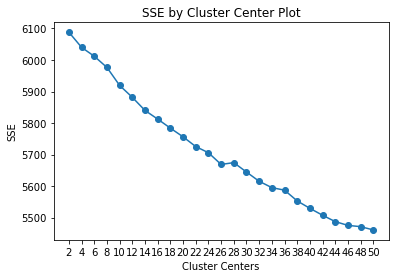

In [44]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(words, 50)

In [64]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=36, random_state=20).fit_predict(words)

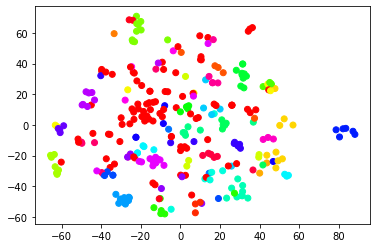

In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(tsne.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.show()


    
plot_tsne_pca(words, clusters)

In [66]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(words, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
service,network,manager,the,leadership,agile,ver,csf,nsw,and

Cluster 1
archive,for,and,belt,e2e,packet,telco,nokia,core,cloud

Cluster 2
age,digital,change,talent,fundamentals,learning,management,consulting,competency,hr

Cluster 3
specific_software,nsw,kmcd,as,integration,professional,gsd,test,specialist,systems

Cluster 4
nsw,nokia,security,certification,solutions,labs,bell,5g,to,end

Cluster 5
by,talk,ted,flowone,nokia,and,the,how,introduction,to

Cluster 6
communicating,administration,dcm,working,and,hive,data,started,getting,with

Cluster 7
sales,improvement,library,and,nsw,offer,execute,for,create,process

Cluster 8
related,trs,ce,n4,tribe,n3,20,rf,mn,onboarding

Cluster 9
applied,and,common,software,architect,delivery,gsd,nsw,kmcd,as

Cluster 10
center,storage,collection,big,training,refinery,ava,analytics,science,data

Cluster 11
5g18,nr,aspects,nokia,and,network,nsw,ran,e2e,5g

Cluster 12
vcs,software,defined,mobile,services,optical,virtualized,ip,nuage,networks

C

In [48]:
input_title = "Developing with Python"
input_vector = vectorizer.transform([input_title])

In [49]:
recommendations = cosine_similarity(input_vector, words)

In [50]:
recs = pd.DataFrame(columns=['Title', 'Amount'])

for idx, elem in enumerate(recommendations[0]):
    if elem > 0.3:
        recs = recs.append({'Title': df.Title[idx], 'Amount': elem}, ignore_index=True)

recs = recs.sort_values(by='Amount', ascending=False)
recs.head()

,Title,Amount
0,Developing with Python,1.000000
7,Data Visualization with Python,0.543920
6,MN-Python,0.485627
21,Advanced Python Topics: Migrating from Python ...,0.478181
27,Developing a Service Mindset,0.417635
